Use dataset of [forest fire data](https://archive.ics.uci.edu/ml/datasets/Forest+Fires), predict the burned area.

In [1]:
import pandas as pd
fire_data = pd.read_csv('forestfires.csv')
fire_data

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [2]:
fire_data.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000029DD259FE50>]],
      dtype=object)

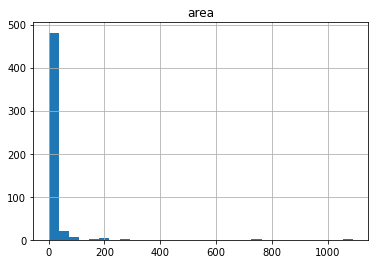

In [3]:
fire_data.hist('area',bins = 30)

### Data split and preprocess
From the area hist  plot, the burned are of the forest ranges from 0 ~ 1000 but the data distribution is highly non uniform.
To copmensate, predict the log of the burned area instead of area itself

In [4]:
import numpy as np
fire_data.month.replace(('jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul',
                         'aug', 'sep', 'oct', 'nov', 'dec'),
                        (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12),
                        inplace=True)
fire_data.day.replace(('mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun'),
                      (1, 2, 3, 4, 5, 6, 7),
                      inplace=True)
fire_data['log_area'] = np.log10(fire_base['area']+1) # Plus 1 to avoid inf
fire_data




,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,log_area
0,7,5,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,0.000000
1,7,4,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0.000000
2,7,4,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0.000000
3,8,6,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,0.000000
4,8,6,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,8,7,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0.871573
513,2,4,8,7,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,1.742647
514,7,4,8,7,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,1.084934
515,1,4,8,6,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0.000000


In [5]:
# Split the data
from sklearn.model_selection import train_test_split
X_data=fire_data.drop(['area'],axis=1).values
y_data=fire_data['log_area'].values
y_data = y_data.reshape(-1,1)
test_size = 0.3
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=test_size)


In [6]:
# REC curve
def rec(m,n,tol):
    if type(m)!='numpy.ndarray':
        m=np.array(m)
    if type(n)!='numpy.ndarray':
        n=np.array(n)
    l=m.size
    percent = 0
    for i in range(l):
        if np.abs(10**m[i]-10**n[i])<=tol:
            percent+=1
    return 100*(percent/l)

In [7]:
#### A linear model
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
linear_reg = Ridge(alpha=1.0)
linear_reg.fit(scaler.fit_transform(X_train),scaler.fit_transform(y_train))



y_pred=linear_reg.predict(X_test)
print("RMSE for linear regression:",np.sqrt(np.mean((y_test-y_pred)**2)))

RMSE for linear regression: 0.45655624878709244


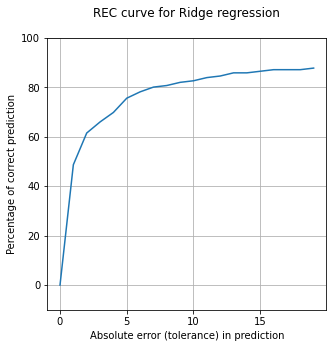

In [8]:
import matplotlib.pyplot as plt
tol_max = 20
rec_SVR=[]

for i in range(tol_max):
    rec_SVR.append(rec(y_pred,y_test,i))

plt.figure(figsize=(5,5))
plt.title("REC curve for Ridge regression\n")
plt.xlabel("Absolute error (tolerance) in prediction")
plt.ylabel("Percentage of correct prediction")
plt.xticks([i*5 for i in range(tol_max+1)])
plt.ylim(-10,100)
plt.yticks([i*20 for i in range(6)])
plt.grid(True)
plt.plot(range(tol_max),rec_SVR)
plt.show()

In [9]:
### Your model starts here
#### A SVR model
from sklearn.svm import SVR
mysvr = SVR(kernel="rbf",epsilon=0.4,C=1)
mysvr.fit(X_train,np.ravel(y_train))
y_predsvr=mysvr.predict(X_test)
# Show the predicted error in RMSE
print("RMSE for svr regression:",np.sqrt(np.mean((y_test-y_predsvr)**2)))

RMSE for svr regression: 0.6929892832847796


r^2 =  1.0
out of bag R^2 =  0.9962870209078509
RMSE for rf regression: 0.9544688422653174
100


<function matplotlib.pyplot.show(*args, **kw)>

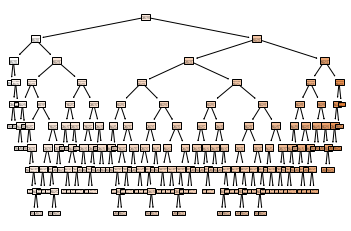

In [10]:
#### A random forest model
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn import tree
regr = RandomForestRegressor(max_depth=9, random_state=0,oob_score = True) 
regr.fit(X_train,np.ravel(y_train))
# Make a prediction of y, using X, see what the r-squared is
y_predrf = regr.predict(X_test)
rsquared = regr.score(X_test, y_predrf, sample_weight=None)
print('r^2 = ', rsquared)
# Out of bag fit
oob = regr.oob_score_
print('out of bag R^2 = ', oob)
# Show the predicted error in RMSE
print("RMSE for rf regression:",np.sqrt(np.mean((y_test-y_predrf)**2)))
# See how any tree from this forest looks 
estimator = regr.estimators_
print(len(estimator))
plt.figure()
tree.plot_tree(estimator[1],
               filled = True);
plt.show


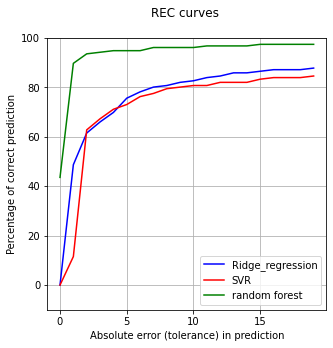

In [11]:
#### Plot REC curves of the linear model, the SVR model, and the random forest model together to compare
tol_max = 20
rec_svr=[]
rec_rf=[]

for i in range(tol_max):
    rec_svr.append(rec(y_predsvr,y_test,i))
for i in range(tol_max):
    rec_rf.append(rec(y_predrf,y_test,i))
plt.figure(figsize=(5,5))
plt.title("REC curves \n")
plt.xlabel("Absolute error (tolerance) in prediction")
plt.ylabel("Percentage of correct prediction")
plt.xticks([i*5 for i in range(tol_max+1)])
plt.ylim(-10,100)
plt.yticks([i*20 for i in range(6)])
plt.grid(True)
plt.plot(range(tol_max),rec_SVR,'b',label='Ridge_regression')
plt.plot(range(tol_max),rec_svr,'r',label='SVR')
plt.plot(range(tol_max),rec_rf,'g',label='random forest')
plt.legend()
plt.show()